# Assignment 5 - Validation & Experimentation

The goal of this assignment is to practice using good experimental design and methodology to train and test classifiers.  You will write some simple code to try doing this yourself, and you will also use the tools built into scikit-learn.

In [1]:
# CSC 4510 - Machine Learning
# Assignment 5
# Scaffolding by Dr. Ben Mitchell
# Assignment completed by: <YOUR NAME(S) HERE>
# Resources used: 
#   <List any resources you used beyond the ones posted on Blackboard>
#   <This can include books, websites, other students, etc.>

In [44]:
# import math and numpy first
import math
import numpy as np
# import scipy for stats package
import scipy
# import some data and classifiers to play with
from sklearn import datasets
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix

### Load some data

SciKit Learn comes with a number of "built-in" datasets beyond the Iris dataset we've been using (see https://scikit-learn.org/stable/datasets/index.html for a full list).  For this assignment, we will load several datasets, and compare the performance of several classifiers on each of them.

First we'll load the iris dataset again, since it's small and easy to play with.

In [3]:
iris = datasets.load_iris()
# let's show the shape, just to remind ourselves
print('dataset shape:', iris.data.shape, 'target shape:', iris.target.shape)

dataset shape: (150, 4) target shape: (150,)


# Part 1: Repeated hold-out validation
We've already done 'hold-out' validation using the `train_test_split` method, but we've used a fixed seed value.  In the last assignment, we manually changed the seed for the random-number generator to get different train/test splits so we could see how the performance of our classifiers changed.  This time, let's write a loop to do the same thing for us.  Copy your code from the previous assignment to split the data 60/40 and then train and test a SVM classifier with an RBF kernel, and put it inside a `for`-loop that runs 10 times.  Each time, seed the `train_test_split` function with the current loop iteration counter (i.e. the first time through, `train_test_split` should be 0, the second time through it should be 1, etc.).  The result should be 10 accuracy scores, which should be stable (i.e. if you re-run the cell, you get the same 10 numbers)

In [4]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=i)
  linearSvm = svm.SVC(kernel='rbf', gamma='scale')
  linearSvm.fit(X_train, y_train)
  linearSvm.score(X_test, y_test)

### Random seed

Now try making a copy of the loop, but leave off the `random_state` argument entirely.  This version of the loop should give you output that is generally similar to the previous one, but each time you re-run it, you should get different scores.  This is because the 'default' for the `train_test_split` function is to not use a static seed value, so every time you run it you'll get a different result.

In [5]:
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
  linearSvm = svm.SVC(kernel='rbf', gamma='auto')
  linearSvm.fit(X_train, y_train)
  linearSvm.score(X_test, y_test)

# Part 2: Computing Statistics

Make copy of the previous cell (i.e. the loop without fixed seeds), but this time instead of printing the individual scores, store them in a list.  The easiest way to do this is to start with an empty list (e.g. `myList = []`), and then add numbers using the `.append()` method.  After the loop is done, print out your list to be sure it looks the way you expect (you should be able to do this with a single print, e.g. `print(myList)`)

In [6]:
myList = []

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
  linearSvm = svm.SVC(kernel='rbf', gamma='auto')
  linearSvm.fit(X_train, y_train)
  myList.append(linearSvm.score(X_test, y_test))

print(myList)

[0.9333333333333333, 0.9666666666666667, 1.0, 0.9, 0.95, 0.9666666666666667, 1.0, 0.9833333333333333, 0.95, 0.9666666666666667]


### Average
Compute the average of the list of numbers you made in the previous step; this is the average accuracy over your 10 trials

In [13]:
def avgList(aList):
  total = 0
  for i in range(len(aList)):
    total += aList[i]
  avg = total/len(aList)
  return avg

avgList(myList)

0.9616666666666667

### Variance & Standard Deviation
Now compute the variance and standard deviation of your list of accuracies.  The standard deviation is the square root of the variance, and the variance is basically just the average squared differences from the mean.  

This will be a bit like the loop you wrote to calculate Euclidean distance, only now you're subtracting the mean rather than a coordinate of another point, and you're going to be dividing by the number of items in the list minus one before you take the square root.  


Note that the symbol for standard deviation is $\sigma$; there's no standard symbol for variance, it's just $\sigma^2$.  Here's the equations, where $N$ is the number of items in the list, $x_i$ is the $i$-th element of the list, and $\mu$ is the mean:

$ \sigma^2 = \frac{1}{N-1} \sum_{i=1}^n (x_i - \mu)^2 $

$ \sigma = \sqrt{\sigma^2} $

In [15]:
def var(aList):
  total = 0
  avg = avgList(aList)
  for i in range(len(aList)):
    total += np.square(aList[i] - avg)
  variance = total/(len(aList) - 1)
  return variance

var(myList)

0.0009290123456790121

In [20]:
def standDev(aList):
  variance = var(aList)
  stDev = np.sqrt(variance)
  return stDev

standDev(myList)

0.030479703831878223

### Stats using scipy
To check and see if you've calculated your statistics correctly, you can use the `scipy.stats` library.  In particular, if you call the method `scipy.stats.describe()` and give it a list of numbers as an argument, it will report a variety of statistics, including mean and variance.  Make sure that these values match the ones you've calculated above.  See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe for documentation.

In the future, it's fine to use the stats library to do this kind of thing for you, but it's a lot easier to understand the numbers coming out of the stats library once you've written code to calculate those numbers yourself.  You can also use this as a reference implementation, to check that your own code produces the same values.

In [17]:
scipy.stats.describe(myList)

DescribeResult(nobs=10, minmax=(0.9, 1.0), mean=0.9616666666666666, variance=0.0009290123456790119, skewness=-0.5675817933805042, kurtosis=-0.18439090076269382)

# Part 3: K-Fold Cross-validation

Now we'll use scikit-learn to do some more complicated types of validation.  Repeatedly re-spliting the data is okay, but it's not ideal from a statistical reliability standpoint (as we discussed in class).  Therefore, a better practice is to use k-fold cross-validation, as shown in this example.  Note the parameter `cv=5`; this is how many 'folds' to use, and will also be how many scores you get out.

In [18]:
clf = svm.SVC(kernel='rbf', gamma = 'auto')
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Statistics on the accuracies

Since `cross_val_score` returns a numpy array, we can use some of the numpy methods to get the mean and standard deviation:

In [19]:
print('mean accuracy:', scores.mean(), ', stdDev:', scores.std())

mean accuracy: 0.9800000000000001 , stdDev: 0.016329931618554516


## Repeated K-fold (aka N-by-K fold)
If you try running the cross-validation cell multiple times, you'll notice you get the same values back every time.  That's because `cross_val_score` doesn't shuffle the data randomly every time you call it.  If we actually want to re-run cross-validation with a new set of point-to-fold assignmenst, we can use the function `RepeatedKFold`, to get a set of folds, and then hand it to `cros_val_score` like this:

In [21]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3)
scores2 = cross_val_score(clf, iris.data, iris.target, cv = rkf)
scores2

array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 1.        ,
       1.        , 0.93333333, 1.        , 0.96666667, 0.96666667,
       0.96666667, 1.        , 0.96666667, 0.96666667, 0.96666667])

In [22]:
print('mean accuracy:', scores2.mean(), ', stdDev:', scores2.std())

mean accuracy: 0.9733333333333334 , stdDev: 0.0180534186769688


# Try using N-by-K to compare some classifiers

Last week, we tried to compare some classifiers by hand; this week, lets use cross-validation and statistics.

First, we'll run 5-fold cross-validation with 4 repeats to train and test a Nearest Neighbor classifier and a Linear-kernel SVM.  Each should give you an array of 20 accuracy values.  Print the mean and standard deviation for each classifier, then print the difference between the means.  Finally, use `scipy.stats.mannwhitneyu()` to check the $p$ value and see whether the difference is statistically significant (just hand it the two score arrays as inputs).

In [23]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 4)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.9549999999999998 , stdDev = 0.02640496586292476
Linear SVM: mean = 0.9683333333333332 , stdDev = 0.02466441431158123
Difference between means: 0.013333333333333308


MannwhitneyuResult(statistic=141.0, pvalue=0.04321022740214513)

In [24]:
rkf = RepeatedKFold(n_splits = 2, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.952 , stdDev = 0.014236104336041755
Linear SVM: mean = 0.9746666666666668 , stdDev = 0.018330302779823362
Difference between means: 0.022666666666666835


MannwhitneyuResult(statistic=64.0, pvalue=9.205356621944933e-05)

In [25]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 2)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.96 , stdDev = 0.04898979485566354
Linear SVM: mean = 0.9800000000000001 , stdDev = 0.030550504633038933
Difference between means: 0.02000000000000013


MannwhitneyuResult(statistic=161.0, pvalue=0.11126561552158842)

In [27]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.9600000000000002 , stdDev = 0.054160256030906385
Linear SVM: mean = 0.9766666666666667 , stdDev = 0.038151743807531974
Difference between means: 0.016666666666666496


MannwhitneyuResult(statistic=4252.5, pvalue=0.0159034556572305)

In [28]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 100)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.9587333333333334 , stdDev = 0.048343171412539965
Linear SVM: mean = 0.9773333333333335 , stdDev = 0.037735924528226404
Difference between means: 0.01860000000000006


MannwhitneyuResult(statistic=396320.0, pvalue=6.364762191037932e-21)

In [29]:
rkf = RepeatedKFold(n_splits = 100, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.9615 , stdDev = 0.1636085266726646
Linear SVM: mean = 0.979 , stdDev = 0.12672410978184065
Difference between means: 0.01749999999999996


MannwhitneyuResult(statistic=485584.0, pvalue=0.0008892385437615158)

In [30]:
rkf = RepeatedKFold(n_splits = 100, n_repeats = 100)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
scipy.stats.mannwhitneyu(nnScores, svmScores)

Nearest Neighbor: mean = 0.96005 , stdDev = 0.169053238655756
Linear SVM: mean = 0.979 , stdDev = 0.12593252161375948
Difference between means: 0.018950000000000022


MannwhitneyuResult(statistic=48548502.0, pvalue=1.9876535655988473e-23)

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Folds | Repeats  |   NN-mean  |  NN-stdev  | SVM-mean  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------|--------------
5     |      4   |    0.957   |   0.035    |  0.977    |   0.032      |     0.033     |   0.032
2     |      10  |    0.952   |   0.014    |  0.974    |   0.018      |     0.022     |   9.205e-05
10    |      2   |    0.960   |   0.048    |  0.98     |   0.031      |     0.020     |   0.111
10    |      10  |    0.960   |   0.054    |  0.977    |   0.038      |     0.017     |   0.016
10    |     100  |    0.959   |   0.048    |  0.977    |   0.038      |     0.018     |   6.365e-21
100   |      10  |    0.962   |   0.164    |  0.979    |   0.127      |     0.017     |   0.001
100   |     100  |    0.960   |   0.169    |  0.979    |   0.126      |     0.019     |   1.988e-23


* All answers were rounded to the nearest thousandth place
* The p-value was reported to nearest thousandth plus their scientific notation component if needed

# Part 4: Alternative Metrics

Up until now, we've just worked with overall accuracy as our only way of "scoring" the performance of a classifier.  Now, we will try out some alternative tools for evaluating classifier performance.  In addition to the `.scores()` method, scikit-learn classifiers have a `.predict()` method which takes in a set of examples as an argument, and returns an array with the predicted labels for those examples.  Here's an example:

In [31]:
train, test, trainLabels, testLabels = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear')
clf.fit(train, trainLabels)
predictions = clf.predict(test)
print('predicted labels: ', predictions)
print('true labels: ', testLabels)

predicted labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
true labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]


## Confusion Matrix

By comparing the predicted labels to the 'true' labels, we could easily compute accuracy like we've done in the past.  This time, however, we want to drill down and get more details, so we're going to build a confusion matrix.

A confusion matrix works by making a 2D array (i.e. a matrix), with the rows corresponding to 'true' class labels and the columns corresponding to 'predicted' class labels.  You just need to loop over the pairs of corresponding true/predicted labels, and add to the count in the corresponding cell of the array.

In [38]:
def confMatrix(predict, truth):
  truthValues = len(np.unique(truth)) # Number of classes 
  confusion = np.zeros((truthValues, truthValues))

  for i in range(len(truth)):
    confusion[truth[i]][predict[i]] += 1

  return confusion

confMatrix(predictions, testLabels)

array([[16.,  0.,  0.],
       [ 0., 22.,  1.],
       [ 0.,  1., 20.]])

### Confusion Matrix using scikit-learn

We can also ask scikit-learn to generate a confusion matrix for us, as the following example shows.  Your own confusion matrix should look just like the one produced by the library.

In [39]:
confMat = confusion_matrix(testLabels, predictions)
print(confMat)

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


## Fancy Graphics

It's also possible to use Python's plotting tools to make fancy graphical versions of a confusion matrix; the following example is adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.  _NOTE:_ it's fine if you don't understand what this function is doing; we haven't really covered making plots yet.  For now, it's okay if this is just magic.

In [40]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



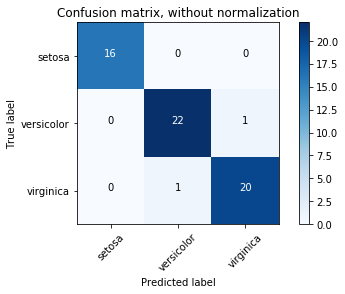

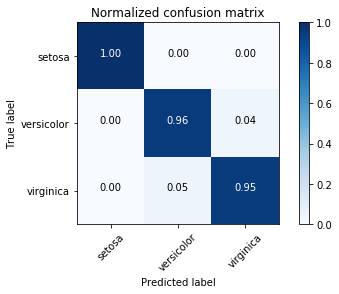

In [41]:

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMat, classes=iris.target_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confMat, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Part 5: Different data sets

Up until now, we've mostly just used a single data set for each assignment; that was fine when we were focused mainly on understanding how the classifiers worked, but we also need to get a feel for how much difference there is between different data sets.  Here, we will load up several different data sets provided by SciKit learn:

In [42]:
cancer = datasets.load_breast_cancer()
digits = datasets.load_digits()
wine = datasets.load_wine()

## Use what you've learned

Use what you've learned from the earlier parts of this assignment to compare the performance of each of the classifiers we've studied (KNN, SVM, Decision Tree, Random Forest) on each of these datasets.  For each dataset, make sure you include markdown cells explaning which classifier you would recommend for that data set and why.

# Iris Dataset

In [56]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')
decTree = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)


nnScores = cross_val_score(nn, iris.data, iris.target, cv = rkf)
svmScores = cross_val_score(svmLinear, iris.data, iris.target, cv = rkf)
decTreeScores = cross_val_score(decTree, iris.data, iris.target, cv = rkf)
clfScores = cross_val_score(clf, iris.data, iris.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Decision Tree: mean = ', decTreeScores.mean(), ', stdDev =', decTreeScores.std())
print('Random Forst: mean = ',clfScores.mean(), ', stdDev =', clfScores.std())
print('Difference between means (svm, nn):', svmScores.mean() - nnScores.mean())
print('Difference between means (decison tree): ', decTreeScores.mean() - svmScores.mean(), decTreeScores.mean() - nnScores.mean())
print('Difference between means (random forest): ', clfScores.mean() - decTreeScores.mean(), clfScores.mean() - svmScores.mean(), clfScores.mean() - nnScores.mean())
# scipy.stats.mannwhitneyu(nnScores, svmScores, decTreeScores, clfScores)

Nearest Neighbor: mean = 0.9593333333333334 , stdDev = 0.0515493291259288
Linear SVM: mean = 0.9786666666666668 , stdDev = 0.03512517299285197
Decision Tree: mean =  0.9460000000000001 , stdDev = 0.06373207809084666
Random Forst: mean =  0.9513333333333336 , stdDev = 0.055661676423031145
Difference between means: 0.019333333333333425
Difference between means (decison tree):  -0.03266666666666673 -0.013333333333333308
Difference between means (random forest):  0.005333333333333523 -0.02733333333333321 -0.007999999999999785


By looking at the data above we see that in terms of the mean. The different classifiers rank as:
* SVM
* NN
* Random Forest
* Decision Tree

For standard deviation, they rank the same. At first glance after running the k-fold cross validation, SVM is the best classifier for the iris data set.

Confusion matrix below will help decide if that is the final suggestion.

In [54]:
train, test, trainLabels, testLabels = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

svmLinear.fit(train, trainLabels)
predictions = svmLinear.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("svm: \n",confMat)

nn.fit(train, trainLabels)
predictions = nn.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("nn: \n",confMat)

decTree.fit(train, trainLabels)
predictions = decTree.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("decTree: \n",confMat)

clf.fit(train, trainLabels)
predictions = clf.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("forest: \n",confMat)

svm: 
 [[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]
nn: 
 [[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
decTree: 
 [[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
forest: 
 [[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


Looking at the confusion matrices. We see that the first column and top row of every matrix is the same. The differences come in the second and third rows and columns. We see that the SVM classifier misclassified the data the least compared to the rest of the different classifiers.

After comparing the means, standard deviations, and confusion matrices. It is decided that the SVM classifier is the best classifier for the iris dataset.

# Cancer Dataset

In [58]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')
decTree = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)


nnScores = cross_val_score(nn, cancer.data, cancer.target, cv = rkf)
svmScores = cross_val_score(svmLinear, cancer.data, cancer.target, cv = rkf)
decTreeScores = cross_val_score(decTree, cancer.data, cancer.target, cv = rkf)
clfScores = cross_val_score(clf, cancer.data, cancer.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Decision Tree: mean = ', decTreeScores.mean(), ', stdDev =', decTreeScores.std())
print('Random Forst: mean = ',clfScores.mean(), ', stdDev =', clfScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
print('Difference between means (decison tree): ', decTreeScores.mean() - svmScores.mean(), decTreeScores.mean() - nnScores.mean())
print('Difference between means (random forest): ', clfScores.mean() - decTreeScores.mean(), clfScores.mean() - svmScores.mean(), clfScores.mean() - nnScores.mean())
# scipy.stats.mannwhitneyu(nnScores, svmScores, decTreeScores, clfScores)

Nearest Neighbor: mean = 0.9145833333333333 , stdDev = 0.03585050679546383
Linear SVM: mean = 0.9555388471177946 , stdDev = 0.023112007872180734
Decision Tree: mean =  0.9231547619047619 , stdDev = 0.033276584741569616
Random Forst: mean =  0.9599373433583959 , stdDev = 0.0235827679951517
Difference between means: 0.04095551378446127
Difference between means (decison tree):  -0.03238408521303271 0.008571428571428563
Difference between means (random forest):  0.036782581453634 0.004398496240601291 0.04535401002506256


By looking at the data above we see that in terms of the mean. The different classifiers rank as:
* Forest
* SVM
* Decision Tree
* NN

For standard deviation, it should be noted that forest has a slightly lower standard deviation then the SVM. The difference is very marginal between the two.

Confusion matrix below will help decide whether the SVM classifier or the forest classifier is better for this dataset.

In [59]:
train, test, trainLabels, testLabels = train_test_split(cancer.data, cancer.target, test_size=0.4, random_state=0)

svmLinear.fit(train, trainLabels)
predictions = svmLinear.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("svm: \n",confMat)

nn.fit(train, trainLabels)
predictions = nn.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("nn: \n",confMat)

decTree.fit(train, trainLabels)
predictions = decTree.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("decTree: \n",confMat)

clf.fit(train, trainLabels)
predictions = clf.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("forest: \n",confMat)

svm: 
 [[ 80   3]
 [  3 142]]
nn: 
 [[ 74   9]
 [  7 138]]
decTree: 
 [[ 69  14]
 [ 15 130]]
forest: 
 [[ 74   9]
 [  3 142]]


From above the SVM and Forest were very close in comparison. By analyzing the confusion matrix above, it can be seen that Forest has several more elements misclassified than the SVM does.

Thus, the edge for better classifier of the cancer dataset is given to the SVM.

# Digits Dataset

In [60]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')
decTree = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)


nnScores = cross_val_score(nn, digits.data, digits.target, cv = rkf)
svmScores = cross_val_score(svmLinear, digits.data, digits.target, cv = rkf)
decTreeScores = cross_val_score(decTree, digits.data, digits.target, cv = rkf)
clfScores = cross_val_score(clf, digits.data, digits.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Decision Tree: mean = ', decTreeScores.mean(), ', stdDev =', decTreeScores.std())
print('Random Forst: mean = ',clfScores.mean(), ', stdDev =', clfScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
print('Difference between means (decison tree): ', decTreeScores.mean() - svmScores.mean(), decTreeScores.mean() - nnScores.mean())
print('Difference between means (random forest): ', clfScores.mean() - decTreeScores.mean(), clfScores.mean() - svmScores.mean(), clfScores.mean() - nnScores.mean())
# scipy.stats.mannwhitneyu(nnScores, svmScores, decTreeScores, clfScores)

Nearest Neighbor: mean = 0.9881474239602731 , stdDev = 0.007737237689586699
Linear SVM: mean = 0.9799106145251396 , stdDev = 0.010283028673791843
Decision Tree: mean =  0.853634698944755 , stdDev = 0.02598402996447224
Random Forst: mean =  0.9776834264432032 , stdDev = 0.009811053056271616
Difference between means: -0.008236809435133496
Difference between means (decison tree):  -0.12627591558038465 -0.13451272501551814
Difference between means (random forest):  0.1240487274984482 -0.0022271880819364487 -0.010463997517069945


By looking at the data above we see that in terms of the mean. The different classifiers rank as:
* NN
* SVM
* Random Forest
* Decision Tree

For standard deviation:
* NN
* Random Forest
* SVM
* Decision Tree

The story for this classifier comparison is a little interesting. Nearset Neighbors has the best mean and the best standard deviation compared to everything else. However, SVM has a very close mean to NN and Forest has a very close standard deviation to NN. The differences between them all are very small as well. 

Confusion matrix below will give us a better picture overall.

In [61]:
train, test, trainLabels, testLabels = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)

svmLinear.fit(train, trainLabels)
predictions = svmLinear.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("svm: \n",confMat)

nn.fit(train, trainLabels)
predictions = nn.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("nn: \n",confMat)

decTree.fit(train, trainLabels)
predictions = decTree.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("decTree: \n",confMat)

clf.fit(train, trainLabels)
predictions = clf.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("forest: \n",confMat)

svm: 
 [[60  0  0  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  1  0  0  1  0]
 [ 0  1 70  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  0  0  0  1  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  1  0 86  1  0  0  1]
 [ 0  1  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  0  0 64  1  0]
 [ 0  2  0  1  1  1  0  0 72  1]
 [ 0  0  0  2  0  1  0  0  0 71]]
nn: 
 [[60  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  0 71  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0]
 [ 0  0  0  0  0 87  1  0  0  1]
 [ 0  0  0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  2  0  1  0  0  0  0 74  1]
 [ 0  0  0  2  0  1  0  0  0 71]]
decTree: 
 [[59  0  0  0  0  1  0  0  0  0]
 [ 5 56  0  1  0  1  2  3  3  2]
 [ 5  1 49  3  1  0  0  1  8  3]
 [ 0  0  1 60  0  3  1  1  1  3]
 [ 0  1  0  1 53  0  1  6  0  1]
 [ 0  4  0  2  3 65  1  3  7  4]
 [ 0  1  0  0  0  1 73  1  0  0]
 [ 0  0  0  0  2  3  0 59  0  1]
 [ 0  6  4  5  0  1  0  4 46 12]
 [ 1  2  0  2  0 

It should be noted that the nearest neighbor has definitely misclassified the lowest amount of data. The interesting part is that Nearest Neighbor, SVM, and Forest all have a very similar pattern in their confusion matrices. However, where the SVM and Random Forest have some misclassifications the Nearest Neighbor classifier does not. 

Thus, the Nearest Neighbor classifier is the best classifier for the digits dataset.

# Wine Dataset

In [62]:
rkf = RepeatedKFold(n_splits = 10, n_repeats = 10)

nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svmLinear = svm.SVC(kernel='linear')
decTree = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)


nnScores = cross_val_score(nn, wine.data, wine.target, cv = rkf)
svmScores = cross_val_score(svmLinear, wine.data, wine.target, cv = rkf)
decTreeScores = cross_val_score(decTree, wine.data, wine.target, cv = rkf)
clfScores = cross_val_score(clf, wine.data, wine.target, cv = rkf)

print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('Decision Tree: mean = ', decTreeScores.mean(), ', stdDev =', decTreeScores.std())
print('Random Forst: mean = ',clfScores.mean(), ', stdDev =', clfScores.std())
print('Difference between means:', svmScores.mean() - nnScores.mean())
print('Difference between means (decison tree): ', decTreeScores.mean() - svmScores.mean(), decTreeScores.mean() - nnScores.mean())
print('Difference between means (random forest): ', clfScores.mean() - decTreeScores.mean(), clfScores.mean() - svmScores.mean(), clfScores.mean() - nnScores.mean())
# scipy.stats.mannwhitneyu(nnScores, svmScores, decTreeScores, clfScores)

Nearest Neighbor: mean = 0.763235294117647 , stdDev = 0.09930917667611418
Linear SVM: mean = 0.9507843137254902 , stdDev = 0.04562966936624376
Decision Tree: mean =  0.9050653594771242 , stdDev = 0.07082744357387699
Random Forst: mean =  0.9814705882352942 , stdDev = 0.030854432860920298
Difference between means: 0.1875490196078432
Difference between means (decison tree):  -0.04571895424836603 0.14183006535947718
Difference between means (random forest):  0.07640522875817002 0.03068627450980399 0.2182352941176472


By looking at the data above we see that in terms of the mean. The different classifiers rank as:
* Random Forest
* SVM
* Decision Tree
* NN

For standard deviation, they rank the same. At first glance after running the k-fold cross validation, Random Forest is the best classifier for the wine data set.

Confusion matrix below will help decide if that is the final suggestion.

In [63]:
train, test, trainLabels, testLabels = train_test_split(wine.data, wine.target, test_size=0.4, random_state=0)

svmLinear.fit(train, trainLabels)
predictions = svmLinear.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("svm: \n",confMat)

nn.fit(train, trainLabels)
predictions = nn.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("nn: \n",confMat)

decTree.fit(train, trainLabels)
predictions = decTree.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("decTree: \n",confMat)

clf.fit(train, trainLabels)
predictions = clf.predict(test)
confMat = confusion_matrix(testLabels, predictions)
print("forest: \n",confMat)

svm: 
 [[22  0  0]
 [ 0 28  3]
 [ 0  0 19]]
nn: 
 [[19  1  2]
 [ 1 25  5]
 [ 3  6 10]]
decTree: 
 [[22  0  0]
 [ 0 28  3]
 [ 1  1 17]]
forest: 
 [[22  0  0]
 [ 0 29  2]
 [ 0  0 19]]


Random Forest have 1 less misclassified value then the SVM classifier does in the confusion matrices. However, since the Random Forest had a better mean and standard deviation as well in the previous section, then it is best to give the edge to Random Forest for the wine dataset.